In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]
len(words)
min(len(w) for w in words)
max(len(w) for w in words)

15

- The dataset is arrange in the order of most common names.
- In case of character level language models, a bigram will only predict the next character.
- A character level language model is predicting the next character in the sequence given some already concrete sequence of characters before it.
- Even a single word has a lot of examples packed into it. (statistical structure). isabella example:
    - Character i is very likely to come first in a sequence.
    - Character s is very likely to come after i.
    - Character a is very likely to come after is.
    - Character b is very likely to come after isa. And so on..
    - Character a is very likely to come after isabell.
    - After isabella, the word is very likely to end.
- Hallucinations: we need extra information regarding first and last character, so we added special tokens `<S>, <E>` at start and end respectively.
- The simples way to learn the statistics of which characters are to follow certain characters is to keep a count of all possible combinations. We will have python dictionary for it.

In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [5]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [7]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [9]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26


(-0.5, 26.5, 26.5, -0.5)

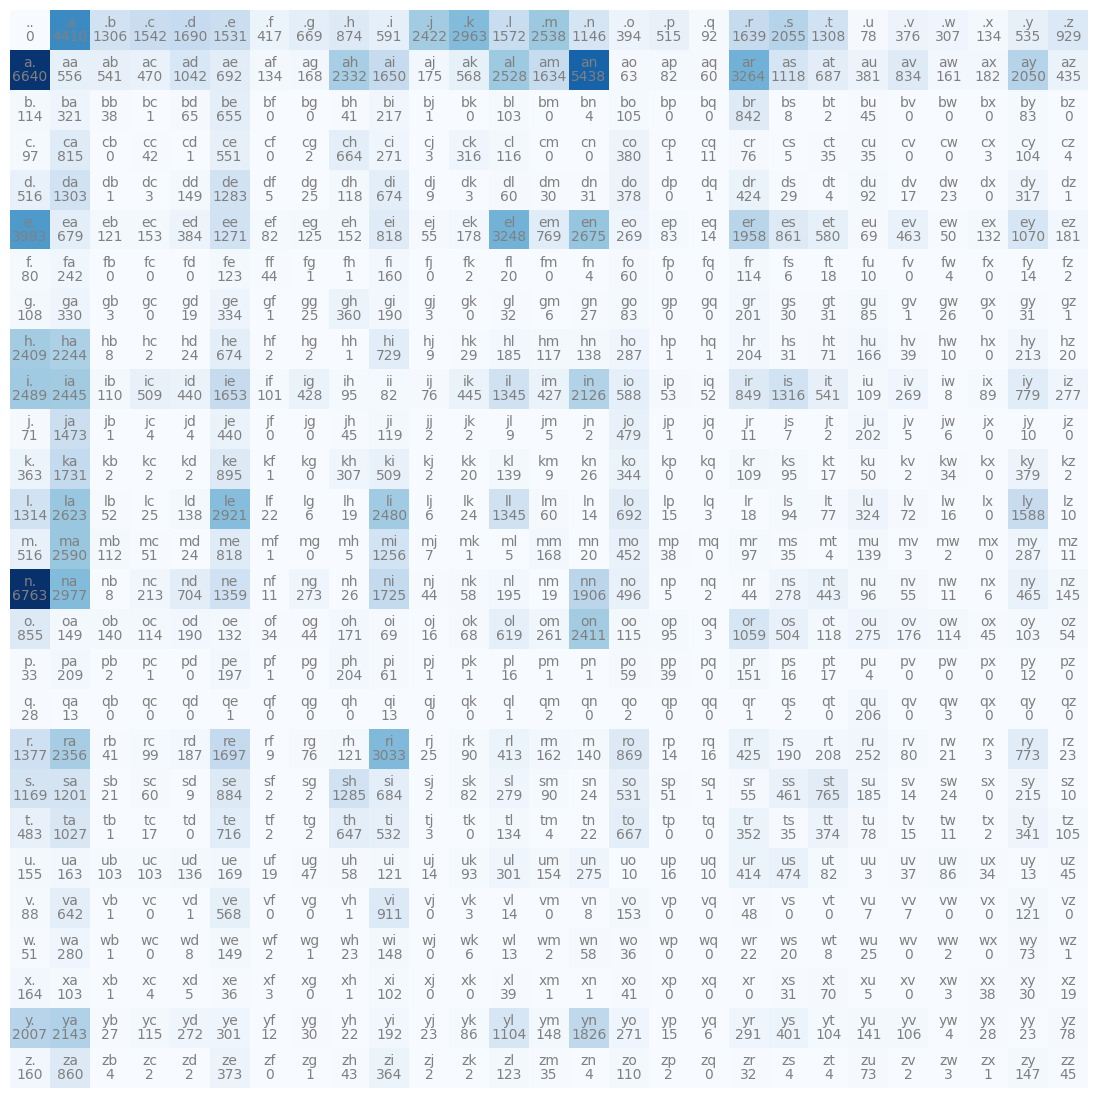

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(N)

plt.figure(figsize=(14, 14))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        print(i, j)
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')
        

# Sampling from the model
- Step1: Calculating the probabilities.
- What is sampling? Given a probability distribution, we would require drawing (or sampling) N no. of samples out of it based on the probability.
- Example: if x has probability distribution of .5 and we draw 10 samples, torch.Multinomial should return around 5 samples as x. (also, closely representing other probabilities in the proba) 
- We can start with value of N = 1. (link)[https://pytorch.org/docs/stable/generated/torch.multinomial.html]
- Generator object in Pytorch will make the result more deterministic. (link)[https://pytorch.org/docs/stable/generated/torch.Generator.html#torch.Generator]
- Replacement=True in torch.Multinomial means that we can draw an element and put it back in the list of eligible indices to draw again. Default value is False.
- "Normalize" word generally means to get the probability distribution.

In [11]:
# Torch multinomial example
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [12]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [13]:
# Applying sampling to determine what should be the first character.
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

# Bigram Algorithm for word generation
- The first row has probability distribution of all the words starting with i = 0.
- Let's say that we pick the next word as m, then we got to the mth row and find out using sampling on what should be the next word.
- We keep on doing this activity until we reach . ==> which means end.
- This is not a very good model as we can see with the results below. 
- This model only take the knowledge of the adjacent characters into consideration.
- While this is terrible, we can also try checking the result with uniform probability distribution and it is going to be much more terrible. (commented below)

# Efficiency
- Precompute the probability distribution for each row.
- `p = N[ix].float() p = p / p.sum()`
- Apart from efficiency, it is critical to get good at Tensor manipulations. We are going to do a lot of complex array operations for efficiency.
- [Torch.sum](https://pytorch.org/docs/stable/generated/torch.sum.html#torch.sum)
- Torch.sum without specifying any dimensions, reduces all the dimensions and hence a single no. is obtained.
- We want the sum of all rows and hence will use dim=1.
- **Broadcasting semantics in Pytorch**
- *Broadcast* is a Numpy specific term, which means that the shorter array is "broadcast" (replicated in an optimized fashion) compared to the larger array when operations need to be carried among two arrays of different lengths.
- (Link)[https://pytorch.org/docs/stable/notes/broadcasting.html]
- *Example*: taking a 27 * 27 array and dividing it by a 27 * 1 array. (satisfies condition for broadcasting).
- `P = P / P.sum(dim=1, keepdim=True)`
- {3, 3, 3} * {2} will become ==> {3, 3, 3} * {2, 2, 2} ==> dimension [1, 3], [1]
- *Conditions for broadcasting*: While iterating over the dimensions sizes, the dimensions size must either be equal, one of them is 1, or one of them doesn't exist.
- `P = P / P.sum` will give us the required probability distribution.
- *Recommendation*: Treat broadcasting semantics with respect. Go through the pytorch doc for it as you can very quickly run into bugs. 
    - *Example*: [27, 27], [27] ==> we align towards right, hence this becomes ==> [27, 27], [1, 27]
    - Hence the keepdim=True is necessary.
    - We are normalizing the columns instead of normalizing the rows.
- **Note**: P /= P.sum ==> will be inplace operation, not requiring extra memory.

In [14]:
P = (N + 1).float()
P /= P.sum(dim=1, keepdim=True)
P.shape

torch.Size([27, 27])

In [15]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):
    ix = 0
    word = ""
    while True:
        p = P[ix]
        # # uniform probability distribution
        # p = torch.ones(27) / 27
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        word += itos[ix]
        if ix == 0:
            break
    print(word)

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


# Evaluating the quality of the model (Loss function)
-  For any word, each of the next word has an equal probability of coming. (1 / 27).
- Hence if our model is giving any number greater than it, means that we have learnt something useful from the model.
- In a ideal scenario, the probabilities for the training set should be closer to 1.
- Likelihood: Product of these probabilities. (probability of the entire dataset)
    - Log Likelihood will be same ==> log(a * b *c) = log(a) + log(b) + log(c)
- Since the product of the probabilities is going to be a very tiny number, we generally work with the log likelihood.
- You can search for "log(x) x from 0 to 1" on wolfram alpha. Value of log 1 is 0 and as the value from 1 to 0, it becomes more and more -ve with the value tending to -inf at 0. (hyperbola).
- *Chain*
    * We want to maximize the probabilities, the likelihood and the log likelihood.
    * We want to minimize the negative log likelihood and the average of it.
- We can use it to get the nll for random words not part of the dataset. If the probability of some combination is 0, the nll will become infinite.
    - **Model smoothing with fake counts**
    - We solve this by initializing the count array with some non-zero value. Let's initialize with 1.
    - `P = (N + 1).float()` 

In [16]:
# Negative log likelihood of the training data
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_likelihood += torch.log(prob)
        n += 1    

nll = -log_likelihood
print(f"{nll:}")
print(f"{nll/n}")

559951.5625
2.4543561935424805


In [17]:
# Negative log likelihood of random words not in the training data
log_likelihood = 0.0
n = 0

for w in ["andrew", "andrej", "andrejq"]:
    log_likelihood = 0.0
    print()
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob}")
        log_likelihood += torch.log(prob)
        n += 1 
    nll = -log_likelihood 
    print(f"nll: {nll}")  

nll = -log_likelihood
print(f"{nll:}")
print(f"{nll/n}")


.a: 0.13758577406406403
an: 0.16038569808006287
nd: 0.03841124475002289
dr: 0.07695093005895615
re: 0.13341714441776276
ew: 0.0024938874412328005
w.: 0.054393306374549866
nll: 20.557376861572266

.a: 0.13758577406406403
an: 0.16038569808006287
nd: 0.03841124475002289
dr: 0.07695093005895615
re: 0.13341714441776276
ej: 0.002738386392593384
j.: 0.024598564952611923
nll: 21.257402420043945

.a: 0.13758577406406403
an: 0.16038569808006287
nd: 0.03841124475002289
dr: 0.07695093005895615
re: 0.13341714441776276
ej: 0.002738386392593384
jq: 0.0003416467516217381
q.: 0.09698996692895889
nll: 27.867216110229492
27.867216110229492
1.2666916847229004


# The Neural Network Approach
- Cast the problem of bigram language model into the neural network framework.
- Our neural network is still going to be a bigram language model. It receives a single character as input.
- Input one character. Neural network will have parameters. It will output the guess of what is likely to follow the input character. 
- Then we will use gradient based optimization to tune the parameters of the network.

# Create the training set of bigrams (xs, ys)
- *Training set is the expected input and output*.
- We have to create the training set of the neural network from the dataset (txt file) which we have.
- We will iterate through all adjacent character. xs will have all the first characters. ys will have all the second characters
- When the input character is xs[i], we want its weights to be arranged such that ys[i] gets a very high probability.

# Feeding integers into neural nets
- In this case, we will use one-hot encoding because it makes more sense to have vectors with the ith bit and all others as zeroes to 
- Providing vector as input to the neural network is much better than providing integer input. Ensure that it is a vector of float when feeding to the neural network rather than integers.

In [18]:
# Create the training set of bigrams (xs, ys)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [19]:
xs

tensor([ 0,  5, 13, 13,  1])

In [20]:
ys

tensor([ 5, 13, 13,  1,  0])

torch.float32

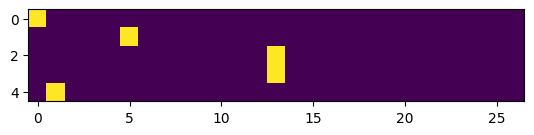

In [26]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc
xenc.shape
plt.imshow(xenc)